In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from scipy.special import boxcox1p, inv_boxcox1p

# 전체 경로
data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'

# 파일 경로
train_data_path = os.path.join(data_dir, 'train.csv')
test_data_path = os.path.join(data_dir, 'test.csv')

# 파일 변수에 저장
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 날짜 데이터 형식 변환
train_data['date'] = train_data['date'].apply(lambda x : str(x[:6])).astype(int)
test_data['date'] = test_data['date'].apply(lambda x : str(x[:6])).astype(int)

# 타겟 정규화
train_data['price'] = boxcox1p(train_data['price'], 0.01)

**정규화**

Type            col             Skewness       
Positive        waterfront      11.728112870701262
Positive        view            2.750729512578878
Positive        yr_renovated    4.568942202679763


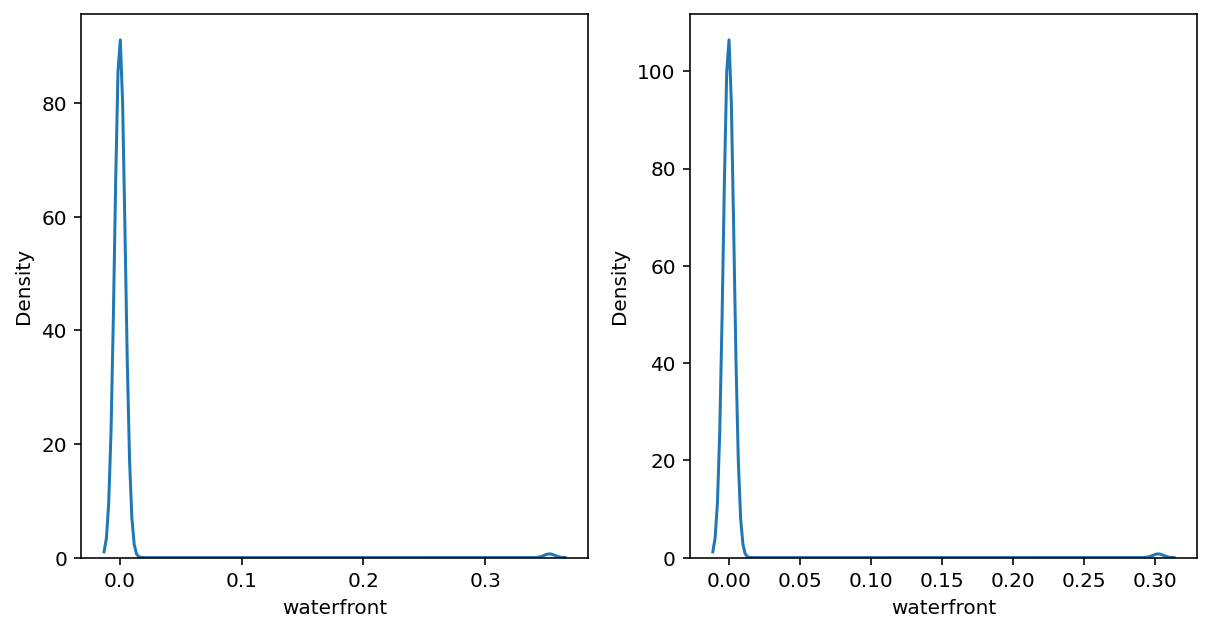

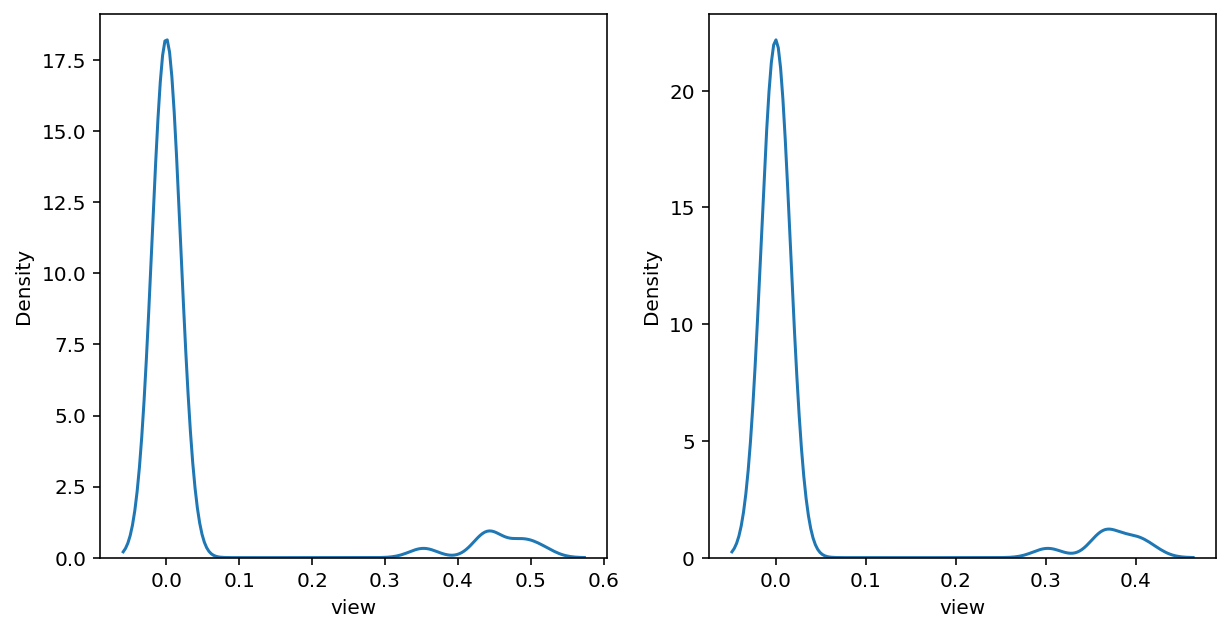

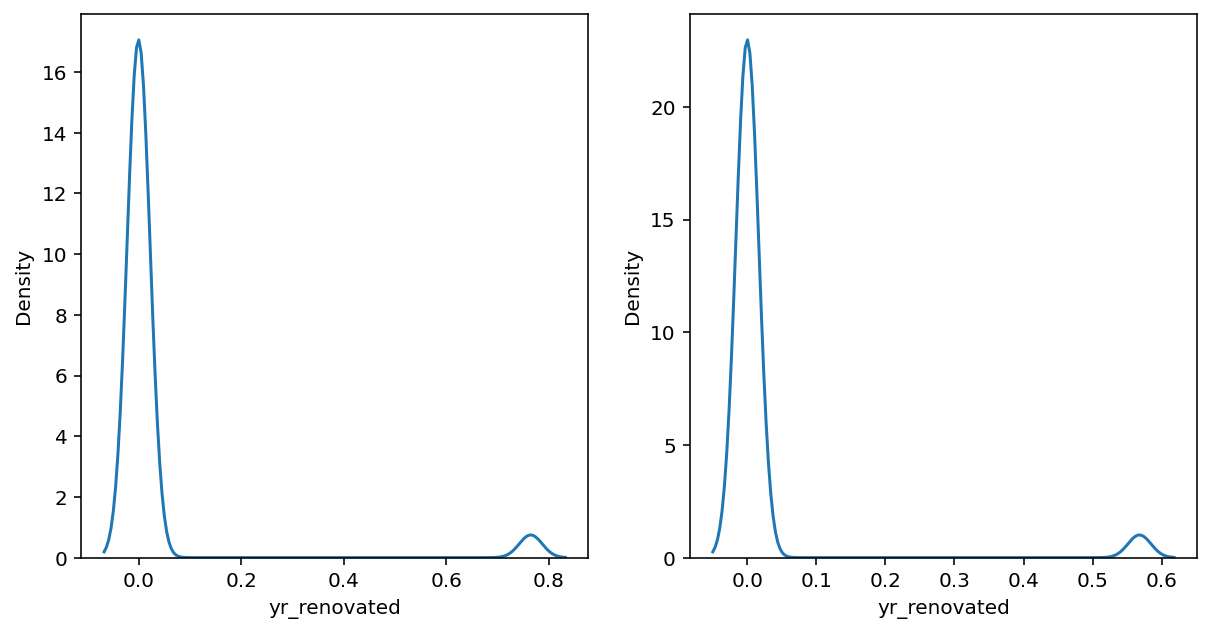

In [18]:
log_list = []
# 왜도 확인 및 로그 변환(정규화) 대상 선정
print("{:<15} {:<15} {:<15}".format('Type','col','Skewness'))
for col in train_data.columns:
    if train_data[col].skew() < -2:
        print("{:<15} {:<15} {:<15}".format('Negative', col, train_data[col].skew()))
    elif 2 < train_data[col].skew():
        print("{:<15} {:<15} {:<15}".format('Positive', col, train_data[col].skew()))
        log_list.append(col)
        
for col in log_list:
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    sns.kdeplot(train_data[col], ax = ax[0])
    train_data[col] = np.log1p(train_data[col].values)
    
    test_data[col] = np.log1p(test_data[col].values)
    sns.kdeplot(train_data[col], ax = ax[1])

**이상치**

<AxesSubplot:xlabel='grade', ylabel='price'>

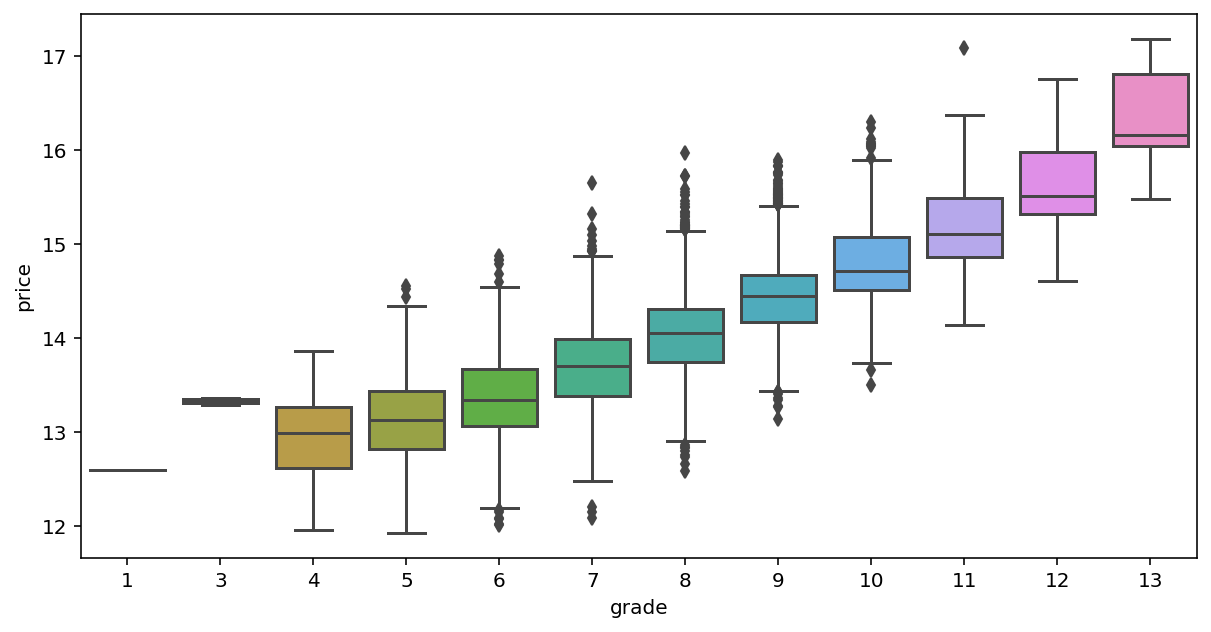

In [20]:
data = pd.concat([train_data['grade'], train_data['price']], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = 'grade', y = 'price', data = data)

In [21]:
# 3등급 이상치 확인
train_data.loc[train_data['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,201502,13.287770,1,0.75,520,9.471319,1.0,0.0,0.0,...,3,520,0,1920,0.0,98022,47.2082,-121.995,1340,9.411974
4123,4123,201411,13.363069,1,0.00,600,10.106510,1.0,0.0,0.0,...,3,600,0,1950,0.0,98045,47.5316,-121.749,990,10.023490


In [22]:
# 11등급 이상치 확인 
train_data.loc[(train_data['grade'] == 11) & (train_data['price'] > 15.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
191,191,201505,16.044345,4,3.25,5050,9.908525,1.5,0.000000,0.365497,...,11,4750,300,1982,0.567931,98004,47.6312,-122.223,3890,9.906533
411,411,201406,15.584700,7,3.50,4640,9.631416,2.0,0.000000,0.302171,...,11,2860,1780,1965,0.567907,98040,47.5666,-122.231,3230,9.937792
1240,1240,201410,15.571586,4,3.25,4280,9.918228,2.0,0.000000,0.000000,...,11,4280,0,1984,0.000000,98004,47.6377,-122.212,3420,9.702105
1403,1403,201411,15.824948,4,3.75,4090,10.119647,2.0,0.000000,0.000000,...,11,3400,690,1926,0.000000,98102,47.6338,-122.319,3910,9.350189
1499,1499,201411,16.373637,4,4.25,5770,9.966509,2.0,0.302171,0.414967,...,11,5770,0,1980,0.000000,98040,47.5850,-122.222,4620,10.032276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,14724,201410,15.739886,3,3.50,3760,8.636752,2.0,0.302171,0.414967,...,11,2830,930,2014,0.000000,98056,47.5285,-122.205,3560,8.659213
14814,14814,201407,15.801531,4,4.25,5010,9.873698,2.0,0.000000,0.302171,...,11,4000,1010,2014,0.000000,98040,47.5455,-122.211,3820,9.744785
14827,14827,201505,15.613938,4,3.25,5640,10.463303,2.0,0.000000,0.365497,...,11,4900,740,2015,0.000000,98006,47.5491,-122.104,4920,10.464074
14928,14928,201412,15.606718,5,3.50,5230,9.100637,2.0,0.000000,0.000000,...,11,4450,780,2014,0.000000,98004,47.5964,-122.201,2310,9.169935


In [23]:
# 이상치 삭제
train_data = train_data.loc[train_data['grade'] != 3]
train_data = train_data.loc[(train_data['grade'] != 11) | (train_data['price'] < 15.5)]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

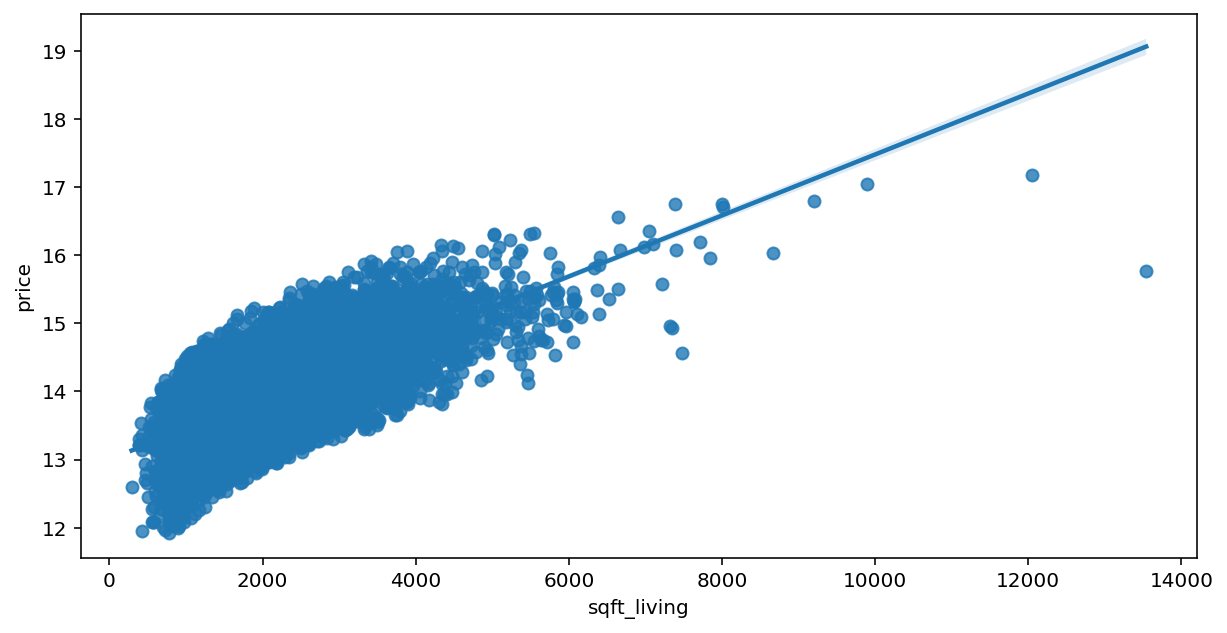

In [24]:
data = pd.concat([train_data['sqft_living'], train_data['price']], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
sns.regplot(x = 'sqft_living', y = 'price', data = data)

In [25]:
# 14000에 가까운 값
train_data.loc[train_data['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,201410,17.183080,6,8.0,12050,10.225607,2.5,0.0,0.396088,...,13,8570,3480,1910,0.567829,98102,47.6298,-122.323,3940,9.082621
8912,8912,201405,15.765553,7,8.0,13540,12.637053,3.0,0.0,0.414967,...,12,9410,4130,1999,0.000000,98053,47.6675,-121.986,4850,12.291337


In [26]:
# 이상치 삭제
train_data = train_data.loc[train_data['sqft_living'] < 12000]

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

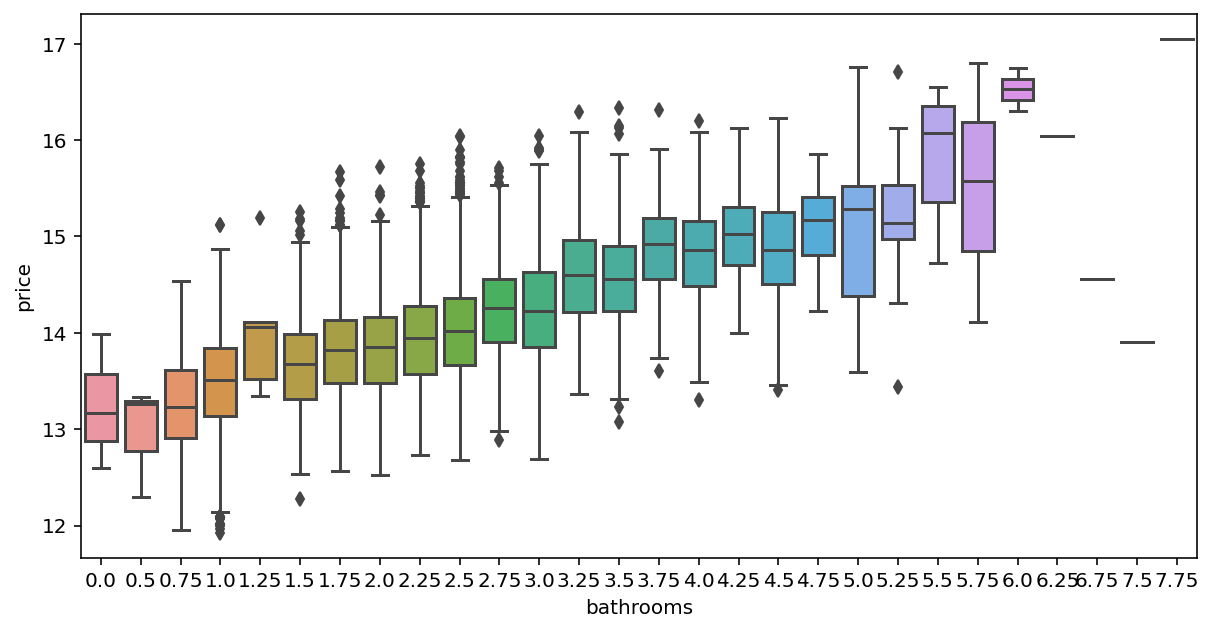

In [27]:
data = pd.concat([train_data['bathrooms'], train_data['price']], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = 'bathrooms', y = 'price', data = data)

In [28]:
# 화장실이 많고 가격이 저렴한 이상치
train_data.loc[(train_data['bathrooms'] == 6.75) | (train_data['bathrooms'] == 7.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2859,2859,201410,14.559446,7,6.75,7480,10.637417,2.0,0.0,0.365497,...,11,5080,2400,1953,0.0,98166,47.4643,-122.368,2810,10.410034
5990,5990,201408,13.902206,9,7.50,4050,8.780326,2.0,0.0,0.000000,...,7,4050,0,1996,0.0,98144,47.5923,-122.301,1448,8.260234


In [29]:
# 이상치 삭제
train_data = train_data.loc[(train_data['bathrooms'] != 6.75) & (train_data['bathrooms'] != 7.5)]

**범주형 데이터**

In [ ]:
# 가격과 비례 관계가 아닌 col은 원핫 인코딩
ohe_list = ['floors', 'view', 'condition']

ohe = OneHotEncoder(sparse = False)

for col in ohe_list:
    train_ohe = ohe.fit_transform(train_data[[col]])
    train_data = pd.concat([train_data.drop(columns = [col]), \
               pd.DataFrame(train_ohe, columns = [col + '_' + str(i) for i in ohe.categories_[0]])], axis = 1)
    
    test_ohe = ohe.transform(test_data[[col]])
    test_data = pd.concat([test_data.drop(columns = [col]), \
               pd.DataFrame(test_ohe, columns = [col + '_' + str(i) for i in ohe.categories_[0]])], axis = 1)

**도시 데이터 생성**

In [ ]:
for data in [train_data, test_data]:
    data['city'] = data['zipcode']

    data['city'] = data['city'].apply(lambda x: 'Bainbridge Island' if x == 98110 else x)
    data['city'] = data['city'].apply(lambda x: 'Seattle' if 98101 <= x <= 98199 else x)
    data['city'] = data['city'].apply(lambda x: 'Auburn' if x == 98001 else x)
    data['city'] = data['city'].apply(lambda x: 'Auburn' if x == 98002 else x)
    data['city'] = data['city'].apply(lambda x: 'Federal Way' if x == 98003 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98004 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98005 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98006 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98007 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98008 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98009 else x)
    data['city'] = data['city'].apply(lambda x: 'Black Diamond' if x == 98010 else x)
    data['city'] = data['city'].apply(lambda x: 'Bothell' if x == 98011 else x)
    data['city'] = data['city'].apply(lambda x: 'Bothell' if x == 98012 else x)
    data['city'] = data['city'].apply(lambda x: 'Burton' if x == 98013 else x)
    data['city'] = data['city'].apply(lambda x: 'Carnation' if x == 98014 else x)
    data['city'] = data['city'].apply(lambda x: 'Bellevue' if x == 98015 else x)
    data['city'] = data['city'].apply(lambda x: 'Duvall' if x == 98019 else x)
    data['city'] = data['city'].apply(lambda x: 'Edmonds' if x == 98020 else x)
    data['city'] = data['city'].apply(lambda x: 'Bothell' if x == 98021 else x)
    data['city'] = data['city'].apply(lambda x: 'Enumclaw' if x == 98022 else x)
    data['city'] = data['city'].apply(lambda x: 'Federal Way' if x == 98023 else x)
    data['city'] = data['city'].apply(lambda x: 'Fall City' if x == 98024 else x)
    data['city'] = data['city'].apply(lambda x: 'Hobart' if x == 98025 else x)
    data['city'] = data['city'].apply(lambda x: 'Edmonds' if x == 98026 else x)
    data['city'] = data['city'].apply(lambda x: 'Issaquah' if x == 98027 else x)
    data['city'] = data['city'].apply(lambda x: 'Kenmore' if x == 98028 else x)
    data['city'] = data['city'].apply(lambda x: 'Issaquah' if x == 98029 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98030 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98031 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98032 else x)
    data['city'] = data['city'].apply(lambda x: 'Kirkland' if x == 98033 else x)
    data['city'] = data['city'].apply(lambda x: 'Kirkland' if x == 98034 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98035 else x)
    data['city'] = data['city'].apply(lambda x: 'Lynnwood' if x == 98036 else x)
    data['city'] = data['city'].apply(lambda x: 'Lynnwood' if x == 98037 else x)
    data['city'] = data['city'].apply(lambda x: 'Maple Valley' if x == 98038 else x)
    data['city'] = data['city'].apply(lambda x: 'Medina' if x == 98039 else x)
    data['city'] = data['city'].apply(lambda x: 'Mercer Island' if x == 98040 else x)
    data['city'] = data['city'].apply(lambda x: 'Bothell' if x == 98041 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98042 else x)
    data['city'] = data['city'].apply(lambda x: 'Mountlake Terrace' if x == 98043 else x)
    data['city'] = data['city'].apply(lambda x: 'North Bend' if x == 98045 else x)
    data['city'] = data['city'].apply(lambda x: 'Lynnwood' if x == 98046 else x)
    data['city'] = data['city'].apply(lambda x: 'Pacific' if x == 98047 else x)
    data['city'] = data['city'].apply(lambda x: 'Preston' if x == 98050 else x)
    data['city'] = data['city'].apply(lambda x: 'Ravensdale' if x == 98051 else x)
    data['city'] = data['city'].apply(lambda x: 'Redmond' if x == 98052 else x)
    data['city'] = data['city'].apply(lambda x: 'Redmond' if x == 98053 else x)
    data['city'] = data['city'].apply(lambda x: 'Redondo' if x == 98054 else x)
    data['city'] = data['city'].apply(lambda x: 'Renton' if x == 98055 else x)
    data['city'] = data['city'].apply(lambda x: 'Renton' if x == 98056 else x)
    data['city'] = data['city'].apply(lambda x: 'Renton' if x == 98057 else x)
    data['city'] = data['city'].apply(lambda x: 'Renton' if x == 98058 else x)
    data['city'] = data['city'].apply(lambda x: 'Renton' if x == 98059 else x)
    data['city'] = data['city'].apply(lambda x: 'Rollingbay' if x == 98061 else x)
    data['city'] = data['city'].apply(lambda x: 'Seahurst' if x == 98062 else x)
    data['city'] = data['city'].apply(lambda x: 'Federal Way' if x == 98063 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98064 else x)
    data['city'] = data['city'].apply(lambda x: 'Snoqualmie' if x == 98065 else x)
    data['city'] = data['city'].apply(lambda x: 'Snoqualmie Pass' if x == 98068 else x)
    data['city'] = data['city'].apply(lambda x: 'Vashon' if x == 98070 else x)
    data['city'] = data['city'].apply(lambda x: 'Auburn' if x == 98071 else x)
    data['city'] = data['city'].apply(lambda x: 'Woodinville' if x == 98072 else x)
    data['city'] = data['city'].apply(lambda x: 'Redmond' if x == 98073 else x)
    data['city'] = data['city'].apply(lambda x: 'Sammamish' if x == 98074 else x)
    data['city'] = data['city'].apply(lambda x: 'Sammamish' if x == 98075 else x)
    data['city'] = data['city'].apply(lambda x: 'Woodinville' if x == 98077 else x)
    data['city'] = data['city'].apply(lambda x: 'Mill Creek' if x == 98082 else x)
    data['city'] = data['city'].apply(lambda x: 'Kirkland' if x == 98083 else x)
    data['city'] = data['city'].apply(lambda x: 'Lynnwood' if x == 98087 else x)
    data['city'] = data['city'].apply(lambda x: 'Kent' if x == 98089 else x)
    data['city'] = data['city'].apply(lambda x: 'Auburn' if x == 98092 else x)
    data['city'] = data['city'].apply(lambda x: 'Federal Way' if x == 98093 else x)

In [ ]:
ohe_list = ['city']

ohe = OneHotEncoder(sparse = False)

for col in ohe_list:
    train_ohe = ohe.fit_transform(train_data[[col]])
    train_data = pd.concat([train_data.drop(columns = [col]), \
               pd.DataFrame(train_ohe, columns = [col + '_' + str(i) for i in ohe.categories_[0]])], axis = 1)
    
    test_ohe = ohe.transform(test_data[[col]])
    test_data = pd.concat([test_data.drop(columns = [col]), \
               pd.DataFrame(test_ohe, columns = [col + '_' + str(i) for i in ohe.categories_[0]])], axis = 1)

**Feature Engineering**

In [ ]:
train_data['per_price'] = train_data['price'] / train_data['sqft_above']
city_price = train_data.groupby(['city'])['per_price'].agg({'mean', 'var'}).reset_index()
train_data = pd.merge(train_data, city_price, how='left', on='city')
test_data = pd.merge(test_data, city_price, how='left', on='city')


for data in [train_data, test_data]:
    data['city_mean'] = data['mean']
    data['city_var'] = data['var']
    del data['mean'] 
    del data['var']

data = pd.concat([train_data['city'], train_data['city_mean']], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
sns.regplot(x = 'city', y = 'city_mean', data = data)

In [ ]:
# 면적당 가격
train_data['per_price'] = train_data['price'] / train_data['sqft_above']

# 우편번호 구분 면적당 가격
zipcode_price = train_data.groupby(['zipcode'])['per_price'].agg({'mean', 'var'}).reset_index()
# 우편번호(비슷한 동네)를 기준으로 그룹 객체 생성, 그에 따른 mean과 var 생성

# data에 입히기
train_data = pd.merge(train_data, zipcode_price, how='left', on='zipcode')
test_data = pd.merge(test_data, zipcode_price, how='left', on='zipcode')

del train_data['per_price']

for data in [train_data, test_data]:
    data['zipcode_mean'] = data['mean'] * data['sqft_above']
    data['zipcode_var'] = data['var'] * data['sqft_above']
    del data['mean'] 
    del data['var']
    
    # 그 외 특징적인 요소
    data['rooms'] = data['bedrooms'] + data['bathrooms'] # 방의 총합
    data['bathbyroom'] = data['bathrooms'] / (data['bedrooms']+0.1) # 방 대비 화장실의 비율
    data['roombybath'] = data['bedrooms'] / (data['bathrooms']+0.1) # 화장실 대비 방의 비율
    data['roos_ratio'] = data['rooms'] / data['sqft_living'] # 주거 공간 대비 방의 비율
    
    
    data['total_sqft'] = data['sqft_above'] + data['sqft_basement'] + data['sqft_living'] + data['sqft_basement'] # 전체 면적
    data['sqft_total_by_lot'] = data['total_sqft'] / data['sqft_lot'] # 부지 대비 집의 면적
    data['sqft_total15'] = data['sqft_living15'] + data['sqft_lot15'] # 15년 기준 집의 면적

In [ ]:
for data in [train_data,test_data]:
    data['zipcode'] = data['zipcode'].astype(str)
    # 45, 5, 35, 4
    data['zipcode-3'] = 'z_' + data['zipcode'].str[2:3]
    data['zipcode-4'] = 'z_' + data['zipcode'].str[3:4]
    data['zipcode-5'] = 'z_' + data['zipcode'].str[4:5]
    data['zipcode-34'] = 'z_' + data['zipcode'].str[2:4]
    data['zipcode-45'] = 'z_' + data['zipcode'].str[3:5]
    data['zipcode-35'] = 'z_' + data['zipcode'].str[2:3] + data['zipcode'].str[4:5]
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# zipcode LabelEncoding
for df in [train_data,test_data]:
    le = LabelEncoder()
    df['zipcode'] = le.fit_transform(df['zipcode'])
    df['zipcode-3'] = le.fit_transform(df['zipcode-3'])
    df['zipcode-4'] = le.fit_transform(df['zipcode-4'])
    df['zipcode-5'] = le.fit_transform(df['zipcode-5'])
    df['zipcode-34'] = le.fit_transform(df['zipcode-34'])
    df['zipcode-45'] = le.fit_transform(df['zipcode-45'])
    df['zipcode-35'] = le.fit_transform(df['zipcode-35'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

for df in [train_data,test_data]:
    coord = df[['lat','long']]
    pca = PCA(n_components=2)
    pca.fit(coord)

    coord_pca = pca.transform(coord)

    df['coord_pca1'] = coord_pca[:, 0]
    df['coord_pca2'] = coord_pca[:, 1]